In [2]:
import numpy as np
import xarray as xr
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import netCDF4
import matplotlib.colors as colors

In [35]:
data = xr.open_dataset('./data/DATA/Obs_SPM_aNam.nc')
type(data)
# print(data)

print(f'data.SPM.values  min {np.nanmin(data.SPM.values)} and max {np.nanmax(data.SPM.values)}' )

print(data)


data.SPM.values  min 0.06964350491762161 and max 1792.2828369140625
<xarray.Dataset>
Dimensions:  (time: 330, lon: 300, lat: 240)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-11-25
  * lon      (lon) float32 6.37 6.38 6.391 6.401 ... 9.453 9.464 9.474 9.484
  * lat      (lat) float32 55.11 55.1 55.09 55.08 ... 52.65 52.64 52.63 52.62
Data variables:
    SPM      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes: (12/48)
    CDI:                        Climate Data Interface version 1.9.8 (https:/...
    history:                    Fri Feb 23 09:16:37 2024: cdo -remapbil,grid_...
    source:                     Sentinel-2 MSI L1C
    institution:                Brockmann Consult GmbH, RBINS, VITO for CMEMS...
    Conventions:                CF-1.7
    TileSize:                   945:1192
    ...                         ...
    time_coverage_start:        20200101T000000Z
    time_coverage_stop:         20200101T235959Z
    titl

In [36]:

# Assign this new DataArray to your dataset
data['SPM'] = np.log10(data.SPM)

# Now your dataset should have the desired dimensions and coordinates
# print(data)

print(f'data.SPM.values  min {np.nanmin(data.SPM.values)} and max {np.nanmax(data.SPM.values)}' )

data.to_netcdf('./data/DATA/Obs_SPM_log10_aNam.nc')

data.SPM.values  min -1.1571193933486938 and max 3.253406524658203


(240, 300)
-1.0217313 3.2534065


/tmp/ipykernel_8465/758994548.py:5: RuntimeWarning: Mean of empty slice
  mean_tgt = np.nanmean(data.SPM, axis=0)#.sel(time='2017')


Text(0.5, 1.0, 'Mean of values')

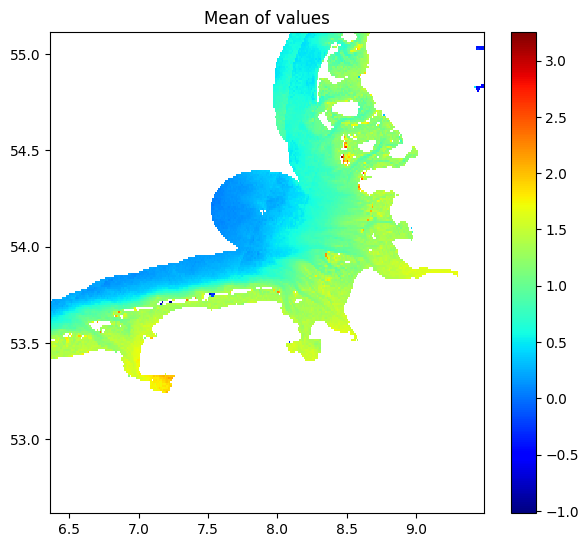

In [38]:
#visualize the mean of the data

nlat = data.lat.size
nlon = data.lon.size
mean_tgt = np.nanmean(data.SPM, axis=0)#.sel(time='2017')

vmin = np.nanmin(mean_tgt)
vmax = np.nanmax(mean_tgt)

print(mean_tgt.shape)
print(vmin,vmax)
fig=plt.figure(figsize=[5+2, 5*(nlon/nlat)])
plt.pcolormesh( data.lon,data.lat, mean_tgt, cmap='jet',vmin=vmin,vmax=vmax)
plt.colorbar()
plt.title('Mean of values')